Epoch 1/50


c:\Users\lewis.lee\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.2433 - val_loss: 1.1504
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1059 - val_loss: 1.0138
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0020 - val_loss: 1.0065
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9935 - val_loss: 1.0054
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9960 - val_loss: 1.0037
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9884 - val_loss: 1.0014
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9856 - val_loss: 0.9981
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9837 - val_loss: 0.9936
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9805 - val_loss: 0.9872
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9685 - val_loss: 0.9795
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9513 - val_loss: 0.9713
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9488 - val_loss: 0.9646


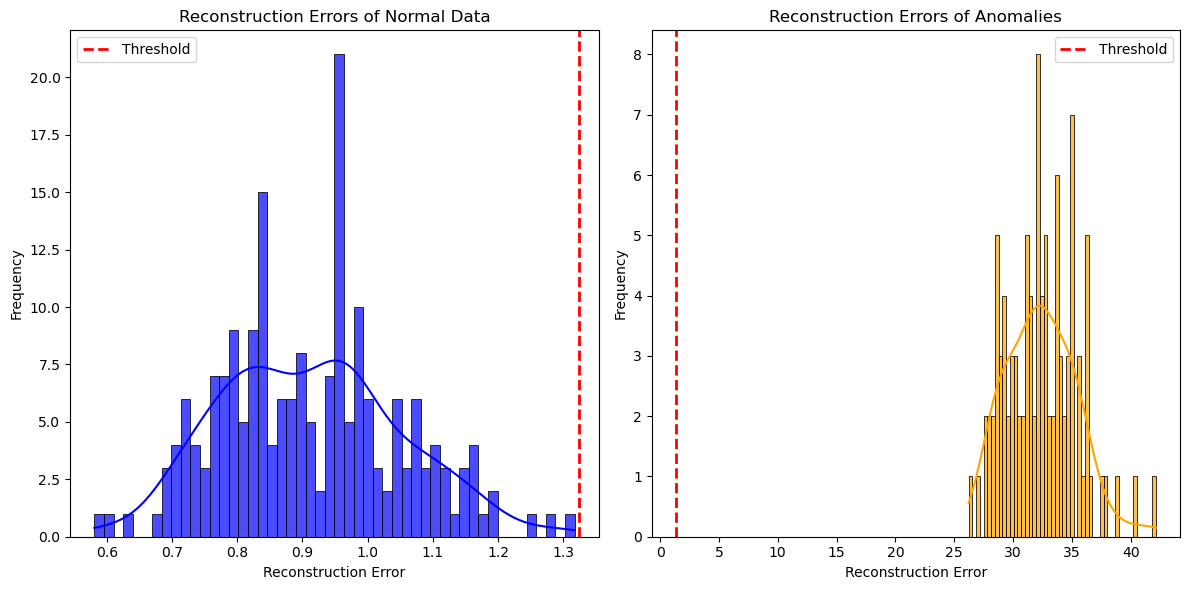

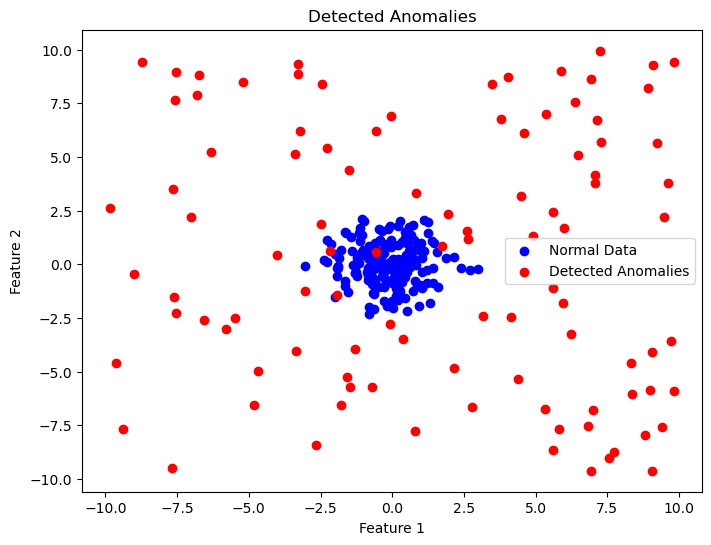

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

# Generate synthetic data (normal data)
normal_data = np.random.normal(loc=0, scale=1, size=(1000, 100))

# Split data into training and testing sets
x_train, x_test = train_test_split(normal_data, test_size=0.2)

# Define the autoencoder architecture
input_dim = x_train.shape[1]

encoder = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(input_dim,)),
    keras.layers.Dense(32, activation='relu')
])

decoder = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(32,)),
    keras.layers.Dense(input_dim, activation='sigmoid')
])

autoencoder = keras.Sequential([encoder, decoder])

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder on normal data
autoencoder.fit(x_train, x_train, epochs=50, batch_size=32, validation_data=(x_test, x_test))

# Use the trained autoencoder to reconstruct test data
reconstructed_data = autoencoder.predict(x_test)

# Calculate reconstruction error for each instance
mse = np.mean(np.square(x_test - reconstructed_data), axis=1)

# Set a threshold for anomaly detection (e.g., mean + 3 standard deviations)
threshold = np.mean(mse) + 3 * np.std(mse)

# Generate synthetic anomalies
anomalies = np.random.uniform(low=-10, high=10, size=(100, input_dim))

# Reconstruct anomalies
reconstructed_anomalies = autoencoder.predict(anomalies)

# Calculate reconstruction error for anomalies
mse_anomalies = np.mean(np.square(anomalies - reconstructed_anomalies), axis=1)

# Identify anomalies
detected_anomalies = anomalies[mse_anomalies > threshold]

# Visualization
plt.figure(figsize=(12, 6))

# Plot reconstruction errors of normal data
plt.subplot(1, 2, 1)
sns.histplot(mse, bins=50, kde=True, color='blue', alpha=0.7)
plt.axvline(x=threshold, color='red', linestyle='--', linewidth=2, label='Threshold')
plt.title('Reconstruction Errors of Normal Data')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.legend()

# Plot reconstruction errors of anomalies
plt.subplot(1, 2, 2)
sns.histplot(mse_anomalies, bins=50, kde=True, color='orange', alpha=0.7)
plt.axvline(x=threshold, color='red', linestyle='--', linewidth=2, label='Threshold')
plt.title('Reconstruction Errors of Anomalies')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

# Plot detected anomalies
plt.figure(figsize=(8, 6))
plt.scatter(x_test[:, 0], x_test[:, 1], color='blue', label='Normal Data')
plt.scatter(detected_anomalies[:, 0], detected_anomalies[:, 1], color='red', label='Detected Anomalies')
plt.title('Detected Anomalies')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()
